In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

C:\Users\strub\anaconda3\envs\prophet39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import os
cwd = os.getcwd()
cwd

'C:\\Users\\strub\\Documents\\Master BHT\\Masterarbeit\\Decomp_Accuracy\\Greykite_Results'

In [3]:
df_prediction = pd.read_csv('series2_raw.csv')
df_prediction['date'] = pd.to_datetime(df_prediction['date'])
df_prediction.tail(31)

,date,trend,yearly,weekly
2161,2021-12-01,0.070254,0.038429,-0.072291
2162,2021-12-02,0.054539,0.040323,-0.018993
2163,2021-12-03,0.089260,0.042377,-0.025910
2164,2021-12-04,0.074190,0.044559,-0.061500
2165,2021-12-05,0.083499,0.046835,-0.106289
2166,2021-12-06,0.063962,0.049164,-0.181829
2167,2021-12-07,0.070453,0.051505,-0.104667
2168,2021-12-08,0.070804,0.053817,-0.072291
2169,2021-12-09,0.054972,0.056058,-0.018993
2170,2021-12-10,0.090235,0.058190,-0.025910


(17956.0, 18261.0)

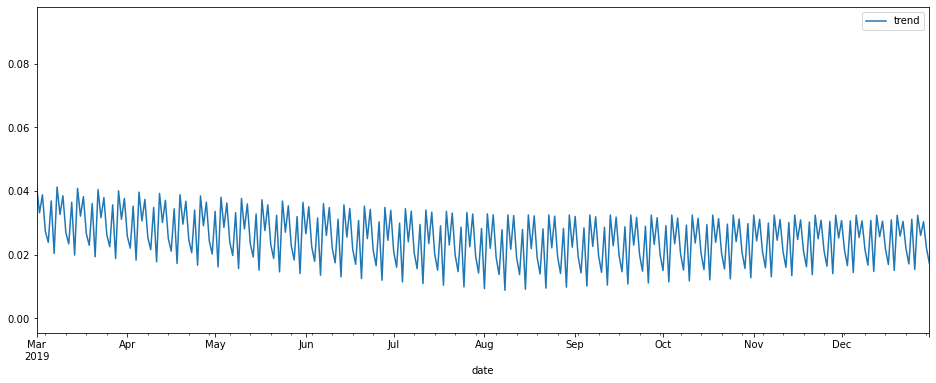

In [4]:
df_prediction.plot(y ='trend', x ='date', figsize=(16,6))
plt.xlim('2019-03-01','2019-12-31')
#plt.ylim(1.0,1.01)





2183
(2183,)


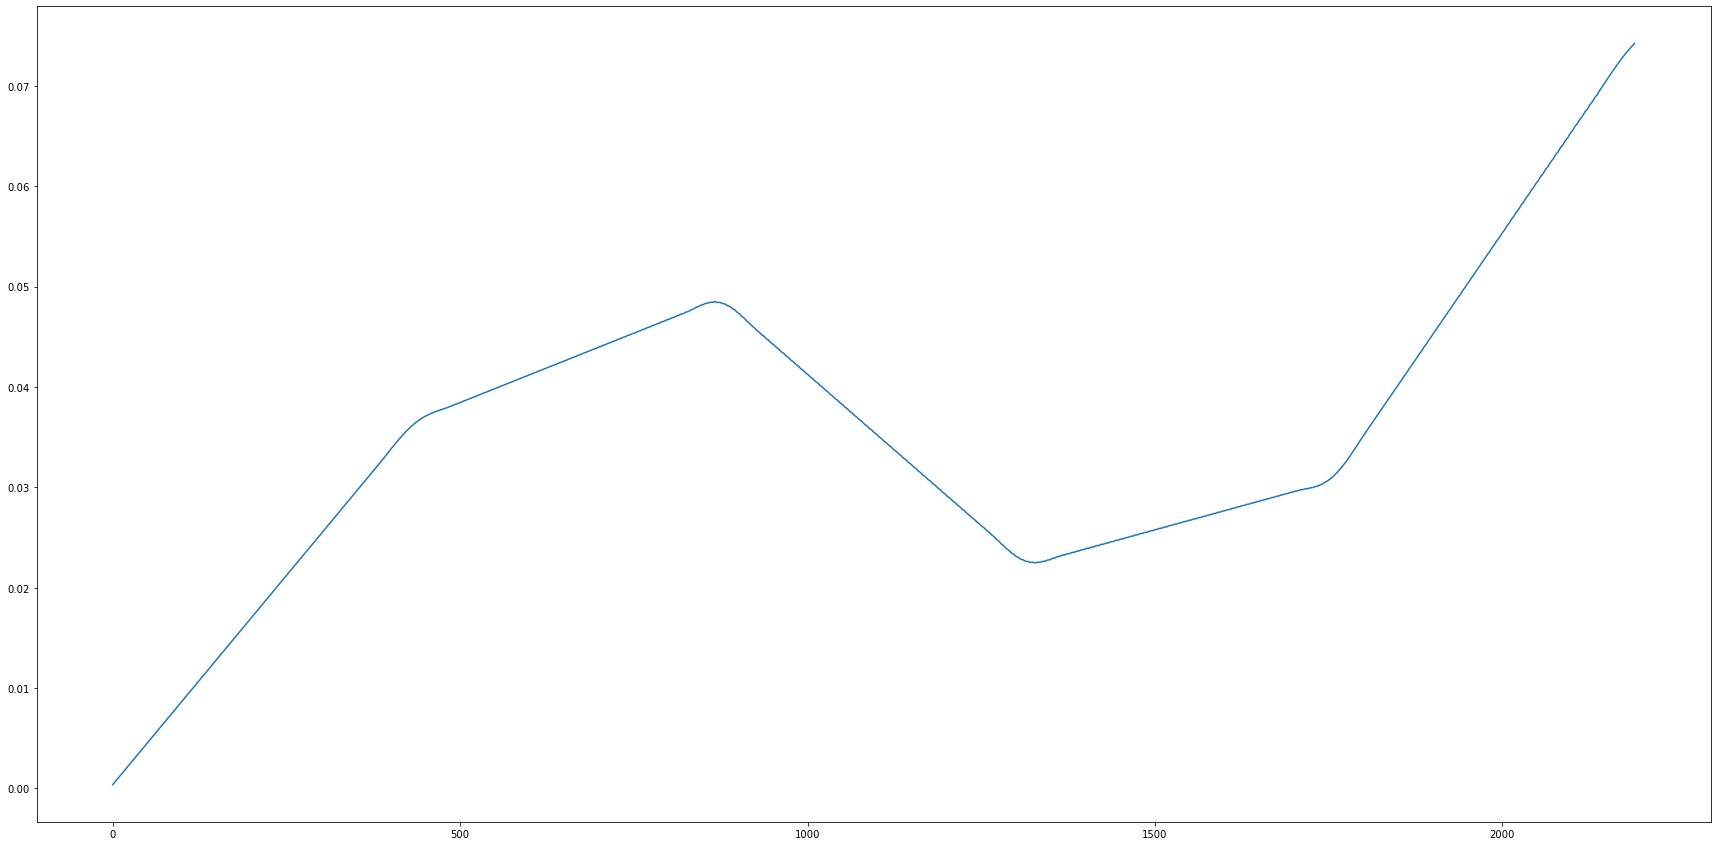

In [5]:
import numpy as np
from scipy.signal import savgol_filter

y = df_prediction['trend']
x = range(0,2192)

## from: https://stackoverflow.com/questions/14313510/how-to-calculate-rolling-moving-average-using-numpy-scipy
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

y_ave = moving_average(y, 10)  ## moving average
x_ave = np.arange(x[0], x[-1], x[-1]/y_ave.shape[0]) ## compensate for shorter signal 
y_savgol = savgol_filter(y_ave, 99, 3) ## Savitzky-Golay filtering 

fig, axs = plt.subplots(1, figsize=(30,15))
#axs.plot(x,y)
axs.plot(x_ave,y_savgol)

#df_prediction.loc[0:2182,'trendsmooth'] = y_savgol
#df_prediction.loc[2183:2192,'trendsmooth'] =  0.159748
df_prediction.loc[9:2192,'trendsmooth'] = y_savgol
df_prediction.loc[0:8,'trendsmooth'] = df_prediction['trend']

print(len(y_savgol))
print(y_savgol.shape)

In [6]:
df_prediction['trendN'] =  (df_prediction['trendsmooth'] - df_prediction['trendsmooth'] .min()) / (df_prediction['trendsmooth'].max() - df_prediction['trendsmooth'].min()) + 1
df_prediction['yearlyN'] = (df_prediction['yearly'] - df_prediction['yearly'].min()) / (df_prediction['yearly'].max() - df_prediction['yearly'].min()) 
df_prediction['monthlyN'] = (df_prediction['weekly'] - df_prediction['weekly'].min()) / (df_prediction['weekly'].max() - df_prediction['weekly'].min()) 
df_prediction.head(10)                                                                         

,date,trend,yearly,weekly,trendsmooth,trendN,yearlyN,monthlyN
0,2016-01-01,0.000000,0.078067,-0.025910,0.000000,1.000000,0.504093,0.957521
1,2016-01-02,0.000069,0.080130,-0.061500,0.000069,1.000925,0.517128,0.738960
2,2016-01-03,0.000167,0.082422,-0.106289,0.000167,1.002251,0.531612,0.463902
3,2016-01-04,0.000219,0.084914,-0.181829,0.000219,1.002953,0.547361,0.000000
4,2016-01-05,0.000410,0.087568,-0.104667,0.000410,1.005528,0.564136,0.473863
5,2016-01-06,0.000409,0.090339,-0.072291,0.000409,1.005515,0.581650,0.672690
6,2016-01-07,0.000453,0.093175,-0.018993,0.000453,1.006104,0.599576,1.000000
7,2016-01-08,0.000703,0.096022,-0.025910,0.000703,1.009467,0.617564,0.957521
8,2016-01-09,0.000549,0.098819,-0.061500,0.000549,1.007398,0.635247,0.738960
9,2016-01-10,0.000752,0.101511,-0.106289,0.000374,1.005036,0.652259,0.463902


In [7]:
# Load True Values
df_true = pd.read_csv('../series2_weekly_complete.csv')
df_true.head()

,date,trueYaddN,trueYmultN,trueYearly,trueYearlyN,trueMonthly,trueMonthlyN,trueTrend,trueTrendN,trueNoise
0,2016-01-01,0.605058,0.529672,1.000000,0.500000,2.363946,1.000000,1.5,1.000000,1.386899
1,2016-01-02,0.514266,0.444995,1.017213,0.508607,1.362371,0.650246,2.0,1.000891,1.187663
2,2016-01-03,0.406297,0.344108,1.034422,0.517211,0.087924,0.205205,2.5,1.001783,1.037538
3,2016-01-04,0.353429,0.294675,1.051620,0.525810,-0.499712,0.000000,3.0,1.002674,0.918400
4,2016-01-05,0.392692,0.331538,1.068802,0.534402,0.041966,0.189156,3.5,1.003566,0.870111


# MAE FOR Yearly SEASONALITY

In [8]:
# Standardize Yearly Pred 

mean = sum(df_prediction['yearlyN']) / len(df_prediction)
standard_deviation = math.sqrt( sum((df_prediction['yearlyN'] - mean)**2 ) / len(df_prediction))
df_prediction['yearlyS']= (df_prediction['yearlyN'] - mean) / standard_deviation

df_prediction.tail()

,date,trend,yearly,weekly,trendsmooth,trendN,yearlyN,monthlyN,yearlyS
2187,2021-12-27,0.065766,0.071545,-0.181829,0.073923,1.996068,0.462873,0.000000,-0.135377
2188,2021-12-28,0.072780,0.072360,-0.104667,0.073998,1.997079,0.468022,0.473863,-0.120234
2189,2021-12-29,0.072454,0.073405,-0.072291,0.074072,1.998072,0.474630,0.672690,-0.100805
2190,2021-12-30,0.056269,0.074700,-0.018993,0.074144,1.999045,0.482814,1.000000,-0.076741
2191,2021-12-31,0.093161,0.076254,-0.025910,0.074215,2.000000,0.492635,0.957521,-0.047862


In [9]:
# Standardize Yearly True

mean = sum(df_true['trueYearlyN']) / len(df_true)
standard_deviation = math.sqrt( sum((df_true['trueYearlyN'] - mean)**2 ) / len(df_true))
df_true['trueYearlyS']= (df_true['trueYearlyN'] - mean) / standard_deviation

df_true.tail()

,date,trueYaddN,trueYmultN,trueYearly,trueYearlyN,trueMonthly,trueMonthlyN,trueTrend,trueTrendN,trueNoise,trueYearlyS
2187,2021-12-27,0.396557,0.366862,0.948380,0.474190,-0.499712,5.750717e-10,559.2,1.994295,0.591832,-0.073046
2188,2021-12-28,0.509969,0.512784,0.965578,0.482789,0.041966,1.891559e-01,560.0,1.995721,1.508898,-0.048713
2189,2021-12-29,0.561928,0.653000,0.982787,0.491393,1.305063,6.302341e-01,560.8,1.997147,0.904003,-0.024366
2190,2021-12-30,0.645526,0.806587,1.000000,0.500000,2.338442,9.910937e-01,561.6,1.998574,0.940978,-0.000011
2191,2021-12-31,0.635107,0.800258,1.017213,0.508607,2.363946,1.000000e+00,562.4,2.000000,0.761115,0.024343


In [ ]:
#Figure to compare actual and predictat yearly seasonality  

import matplotlib.pyplot as plt 

y1 = df_true['trueYearlyS']
y2 = df_prediction['yearlyS']
x1 = pd.to_datetime(df_true['date'])
x2 = pd.to_datetime(df_prediction['date'])


plt.plot(x1, y1)
plt.plot(x2, y2)

plt.title("Plot Multiple lines in Matplotlib",fontsize=15)
plt.xlabel("X",fontsize=13)
plt.ylabel("Y",fontsize=13)
#plt.legend()
plt.rcParams["figure.figsize"] = (16,12)
plt.show()

### MAE

In [10]:
y_true = df_true['trueYearlyS']
y_pred = df_prediction['yearlyS'][0:2192]
print("Mean Absolute Error:\n")
print(mean_absolute_error(y_true, y_pred))

Mean Absolute Error:

0.06766580559485921


### RMSE

In [ ]:
mse=mean_squared_error(y_true, y_pred)
rmse = math.sqrt(mse)
print("Root Mean Square Error:\n")
print(rmse)

# MAE FOR Monthly SEASONALITY

In [7]:
# Standardize monthly Pred 

mean = sum(df_prediction['monthlyN']) / len(df_prediction)
standard_deviation = math.sqrt( sum((df_prediction['monthlyN'] - mean)**2 ) / len(df_prediction))
df_prediction['monthlyS']= (df_prediction['monthlyN'] - mean) / standard_deviation

df_prediction.tail()

,date,trend,yearly,weekly,trendsmooth,trendN,yearlyN,monthlyN,yearlyS,monthlyS
2187,2021-12-27,-0.021419,0.086858,0.054751,-0.025207,1.004663,0.675422,1.000000,0.035154,1.839941
2188,2021-12-28,-0.025402,0.086234,-0.006345,-0.025284,1.003481,0.673427,0.019092,0.026135,-0.858002
2189,2021-12-29,-0.021612,0.086330,-0.003001,-0.025361,1.002310,0.673732,0.072780,0.027517,-0.710336
2190,2021-12-30,-0.021562,0.087131,-0.003551,-0.025437,1.001149,0.676296,0.063945,0.039105,-0.734635
2191,2021-12-31,-0.032228,0.088582,-0.007534,-0.025512,1.000000,0.680936,0.000000,0.060084,-0.910513


In [ ]:
# Standardize Monthly True

mean = sum(df_true['trueMonthlyN']) / len(df_true)
standard_deviation = math.sqrt( sum((df_true['trueMonthlyN'] - mean)**2 ) / len(df_true))
df_true['trueMonthlyS']= (df_true['trueMonthlyN'] - mean) / standard_deviation

df_true.tail()

In [ ]:
#Figure to compare actual and predictat monthly seasonality  

import matplotlib.pyplot as plt 

y1 = df_true['trueMonthlyS']
y2 = df_prediction['monthlyS'][0:2192]
x1 = df_true['date']
x2 = pd.to_datetime(df_prediction['date'])


plt.plot(x1, y1)
plt.plot(x1, y2)

plt.title("Plot Multiple lines in Matplotlib",fontsize=15)
plt.xlabel("X",fontsize=13)
plt.ylabel("Y",fontsize=13)
#plt.legend()
plt.rcParams["figure.figsize"] = (16,12)
plt.xlim('2018-04-01','2018-04-30')
plt.show()

### MAE Monthly

In [11]:
y_true = df_true['trueMonthlyS']
y_pred = df_prediction['monthlyS'][0:2192]
print("Mean Absolute Error:\n")
print(mean_absolute_error(y_true, y_pred))

KeyError: 'trueMonthlyS'

### RMSE Monthly

In [ ]:
mse=mean_squared_error(y_true, y_pred)
rmse = math.sqrt(mse)
print("Root Mean Square Error:\n")
print(rmse)

# MAE FOR TREND 

In [12]:
# Standardize Trend Pred 

mean = sum(df_prediction['trendN']) / len(df_prediction)
standard_deviation = math.sqrt( sum((df_prediction['trendN'] - mean)**2 ) / len(df_prediction))
df_prediction['trendS']= (df_prediction['trendN'] - mean) / standard_deviation

df_prediction.head()

,date,trend,yearly,weekly,trendsmooth,trendN,yearlyN,monthlyN,yearlyS,trendS
0,2016-01-01,0.000000,0.078067,-0.025910,0.000000,1.000000,0.504093,0.957521,-0.014168,-2.382263
1,2016-01-02,0.000069,0.080130,-0.061500,0.000069,1.000925,0.517128,0.738960,0.024158,-2.377593
2,2016-01-03,0.000167,0.082422,-0.106289,0.000167,1.002251,0.531612,0.463902,0.066749,-2.370894
3,2016-01-04,0.000219,0.084914,-0.181829,0.000219,1.002953,0.547361,0.000000,0.113059,-2.367352
4,2016-01-05,0.000410,0.087568,-0.104667,0.000410,1.005528,0.564136,0.473863,0.162385,-2.354347


In [13]:
df_prediction.to_csv('silverkiteSeries2.csv',index=False)

In [ ]:
# Standardize Trend True 

mean = sum(df_true['trueTrendN']) / len(df_true)
standard_deviation = math.sqrt( sum((df_true['trueTrendN'] - mean)**2 ) / len(df_true))
df_true['trueTrendS']= (df_true['trueTrendN'] - mean) / standard_deviation

df_true.tail()

In [ ]:
import matplotlib.pyplot as plt 

y1 = df_true['trueTrendS']
y2 = df_prediction['trendS']
x1 = pd.to_datetime(df_true['date'])
x2 = pd.to_datetime(df_prediction['date'])


plt.plot(x1, y1)
plt.plot(x2, y2)

plt.title("Plot Multiple lines in Matplotlib",fontsize=15)
plt.xlabel("X",fontsize=13)
plt.ylabel("Y",fontsize=13)
#plt.legend()
plt.rcParams["figure.figsize"] = (16,12)
plt.show()

### MAE Trend

In [ ]:
y_true = df_true['trueTrendS']
y_pred = df_prediction['trendS'][0:2192]
print("Mean Absolute Error:\n")
print(mean_absolute_error(y_true, y_pred))

### RMSE Trend

In [ ]:
mse=mean_squared_error(y_true, y_pred)
rmse = math.sqrt(mse)
print("Root Mean Square Error:\n")
print(rmse)

### Changepoints

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [ ]:
m.changepoints